In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style
import csv

path = "/content/drive/My Drive/data_train.csv"
data = np.genfromtxt(path, delimiter=',')

train_x_data = data[:, 0]
train_y_data = data[:, 1]
train_z_data = data[:, 2]
train_h_data = data[:, 3]

path2 = "/content/drive/My Drive/data_test.csv"
data = np.genfromtxt(path2, delimiter=',')

test_x_data = data[:, 0]
test_y_data = data[:, 1]
test_z_data = data[:, 2]
test_h_data = data[:, 3]

#with open('/content/drive/My Drive/data_train.csv', newline='') as myfile:
#    reader  = csv.reader(myfile, delimiter=',')
#    ct = 1 
#    for i in reader:
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
#        train_x_data.append(i[0])
#        train_y_data.append(i[1])
#        train_z_data.append(i[2])
#        train_h_data.append(i[3])

#with open('/content/drive/My Drive/data_test.csv', newline='') as myfile:
#    reader  = csv.reader(myfile, delimiter=',')
#    ct = 1 
#    for i in reader:
#        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
#        test_x_data.append(i[0])
#        test_x_data.append(i[1])
#        test_x_data.append(i[2])
#        test_x_data.append(i[3])

#for i in range(len(train_x_data)):
  #print('train_x_data[', i, '] =', train_x_data[i])

#print(type(train_x_data[0]))
#print(train_x_data[100])
#print(len(train_x_data))

#----------------------------------------------------------------------------------------TRAIN_DATA NORMALIZATION (그냥 표본가지고 뽑아버리면 Runningtime Error:overflow가 발생함)

min_train_x_data = float(300)
min_train_y_data = float(300)
min_train_z_data = float(300)
min_train_h_data = float(300)

max_train_x_data = float(0)
max_train_y_data = float(0)
max_train_z_data = float(0)
max_train_h_data = float(0)

for i in range(len(train_x_data)):
  if min_train_x_data > train_x_data[i]:
    min_train_x_data = train_x_data[i]
  if min_train_y_data > train_y_data[i]:
    min_train_y_data = train_y_data[i]
  if min_train_z_data > train_z_data[i]:
    min_train_z_data = train_z_data[i]
  if min_train_h_data > train_h_data[i]:
    min_train_h_data = train_h_data[i]

print('min_train_x_data =', min_train_x_data)
print('min_train_y_data =', min_train_y_data)
print('min_train_z_data =', min_train_z_data)
print('min_train_h_data =', min_train_h_data)

for i in range(len(train_x_data)):
  if max_train_x_data < train_x_data[i]:
    max_train_x_data = train_x_data[i]
  if max_train_y_data < train_y_data[i]:
    max_train_y_data = train_y_data[i]
  if max_train_z_data < train_z_data[i]:
    max_train_z_data = train_z_data[i]
  if max_train_h_data < train_h_data[i]:
    max_train_h_data = train_h_data[i]
print()
print('max_train_x_data =', max_train_x_data)
print('max_train_y_data =', max_train_y_data)
print('max_train_z_data =', max_train_z_data)
print('max_train_h_data =', max_train_h_data)
print()

for i in range(len(train_x_data)):
  train_x_data[i] = (train_x_data[i] - min_train_x_data)/(max_train_x_data - min_train_x_data)
  train_y_data[i] = (train_y_data[i] - min_train_y_data)/(max_train_y_data - min_train_y_data)
  train_z_data[i] = (train_z_data[i] - min_train_z_data)/(max_train_z_data - min_train_z_data)
  train_h_data[i] = (train_h_data[i] - min_train_h_data)/(max_train_h_data - min_train_h_data)



min_train_x_data = 0.029941313
min_train_y_data = -8.932101598
min_train_z_data = -18.76220986
min_train_h_data = -96.11724036

max_train_x_data = 301.7826308
max_train_y_data = 308.9869349
max_train_z_data = 308.1620473
max_train_h_data = 953.389368



In [0]:
learning_rate = float(0.001)

theta0 = float(-5)    #임의로 초기값 설정
theta1 = float(0)
theta2 = float(5)
theta3 = float(10)
m = float(len(train_x_data))

gradient_theta0 = float(0)
gradient_theta1 = float(0)
gradient_theta2 = float(0)
gradient_theta3 = float(0)

space_theta0 = []
space_theta1 = []
space_theta2 = []
space_theta3 = []

new_theta0 = float(0)
new_theta1 = float(0)
new_theta2 = float(0)
new_theta3 = float(0)

for i in range(100000):
  for j in range(len(train_x_data)):
    x = train_x_data[j]
    y = train_y_data[j]
    z = train_z_data[j]
    h = train_h_data[j]
    gradient_theta0 += ((theta0 + (theta1 * x) + (theta2 * y) + (theta3 * z) - h))/m
    gradient_theta1 += (x * (theta0 + (theta1 * x) + (theta2 * y) + (theta3 * z) - h))/m
    gradient_theta2 += (y * (theta0 + (theta1 * x) + (theta2 * y) + (theta3 * z) - h))/m
    gradient_theta3 += (z * (theta0 + (theta1 * x) + (theta2 * y) + (theta3 * z) - h))/m
  new_theta0 = theta0 - (learning_rate * gradient_theta0)
  new_theta1 = theta1 - (learning_rate * gradient_theta1)
  new_theta2 = theta2 - (learning_rate * gradient_theta2)
  new_theta3 = theta3 - (learning_rate * gradient_theta3)
  gradient_theta0 = float(0)
  gradient_theta1 = float(0)
  gradient_theta2 = float(0)
  gradient_theta3 = float(0) #초기화
  theta0 = new_theta0
  theta1 = new_theta1
  theta2 = new_theta2
  theta3 = new_theta3
  space_theta0.append(theta0)
  space_theta1.append(theta1)
  space_theta2.append(theta2)
  space_theta3.append(theta3)

print('theta0 =', theta0)
print('theta1 =', theta1)
print('theta2 =', theta2)
print('theta3 =', theta3)



theta0 = -0.2537705100073952
theta1 = -4.709719358743012
theta2 = 0.6056306840104099
theta3 = 5.436240491431177


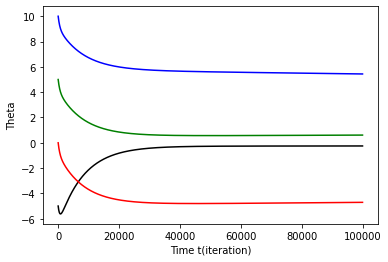

100000


In [0]:
x = range(100000)
y1 = space_theta0[:100000]
y2 = space_theta1[:100000]
y3 = space_theta2[:100000]
y4 = space_theta3[:100000]

plt.xlabel('Time t(iteration)')
plt.ylabel('Theta')
plt.plot(x, y1, 'black', x, y2, 'red', x, y3, 'green', x, y4, 'blue')
plt.show()



In [0]:
result = float(0)
J = []

for i in range(len(space_theta0)):
  theta0 = space_theta0[i]
  theta1 = space_theta1[i]
  theta2 = space_theta2[i]
  theta3 = space_theta3[i]
  for j in range(len(train_x_data)):
    x = train_x_data[j]
    y = train_y_data[j]
    z = train_z_data[j]
    h = train_h_data[j]
    result += ((theta0 + (theta1 * x) + (theta2 * y) + (theta3 * z) - h) ** 2) / (2 * m)
  J.append(result)
  result = float(0)


100000


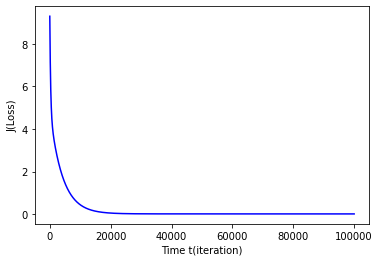

In [0]:
#print(len(J))
x = range(100000)
plt.xlabel('Time t(iteration)')
plt.ylabel('J(trainset - Loss)')
plt.plot(x, J, 'blue')
plt.show()


In [0]:
#------------------------------------------------------------------------------------------------- TEST_DATA NORMALIZATION

min_test_x_data = float(300)
min_test_y_data = float(300)
min_test_z_data = float(300)
min_test_h_data = float(300)

max_test_x_data = float(0)
max_test_y_data = float(0)
max_test_z_data = float(0)
max_test_h_data = float(0)

for i in range(len(test_x_data)):
  if min_test_x_data > test_x_data[i]:
    min_test_x_data = test_x_data[i]
  if min_test_y_data > test_y_data[i]:
    min_test_y_data = test_y_data[i]
  if min_test_z_data > test_z_data[i]:
    min_test_z_data = test_z_data[i]
  if min_test_h_data > test_h_data[i]:
    min_test_h_data = test_h_data[i]

for i in range(len(test_x_data)):
  if max_test_x_data < test_x_data[i]:
    max_test_x_data = test_x_data[i]
  if max_test_y_data < test_y_data[i]:
    max_test_y_data = test_y_data[i]
  if max_test_z_data < test_z_data[i]:
    max_test_z_data = test_z_data[i]
  if max_test_h_data < test_h_data[i]:
    max_test_h_data = test_h_data[i]

for i in range(len(test_x_data)):
  test_x_data[i] = (test_x_data[i] - min_test_x_data)/(max_test_x_data - min_test_x_data)
  test_y_data[i] = (test_y_data[i] - min_test_y_data)/(max_test_y_data - min_test_y_data)
  test_z_data[i] = (test_z_data[i] - min_test_z_data)/(max_test_z_data - min_test_z_data)
  test_h_data[i] = (test_h_data[i] - min_test_h_data)/(max_test_h_data - min_test_h_data)




0.6713640782429345


In [0]:
result = float(0)
J2 = []

for i in range(len(space_theta0)):
  theta0 = space_theta0[i]
  theta1 = space_theta1[i]
  theta2 = space_theta2[i]
  theta3 = space_theta3[i]
  for j in range(len(test_x_data)):
    x = test_x_data[j]
    y = test_y_data[j]
    z = test_z_data[j]
    h = test_h_data[j]
    result += ((theta0 + (theta1 * x) + (theta2 * y) + (theta3 * z) - h) ** 2) / (2 * m)
  J2.append(result)
  result = float(0)

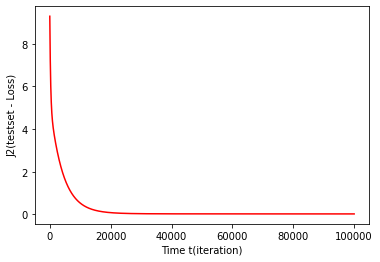

In [0]:
x = range(100000)
plt.xlabel('Time t(iteration)')
plt.ylabel('J2(testset - Loss)')
plt.plot(x, J2, 'red')
plt.show()